In [33]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import binom,geom,f
import pandas as pd
from sklearn import linear_model

# Basic Statistics

## This python notebook has general statistics commands that I studied during the module of Basic Statistics from the Data Science BootCamp at IGTI

Here we can find some very basic commands that can be applied while studying statistics with python 

## 1. Binomial Distribution 

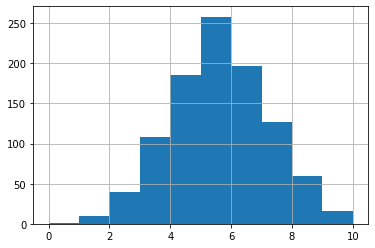

In [6]:
#### Distribuição Binomial Exemplo 1
binom.pmf(2,10,0.5) 

x = np.arange(0,10,1)
binomial_pmf = binom.pmf(x, n=30, p=.5)

### Plotting
n= 10
p=.5
np.random.binomial(n,p,30)
plt.hist(np.random.binomial(n,p,1000),bins=10)
plt.grid()

## 2. Geometric Distribution

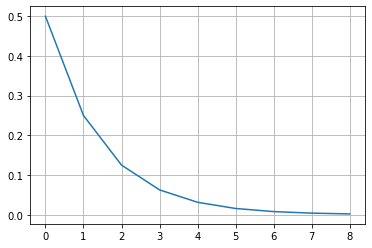

In [7]:
geom.pmf(6,.5)
plt.plot(geom.pmf(np.arange(1,10),.5))
plt.grid()

## 3. Normal Distribution
Creating a normal distribution and then checking it's normality with a Q-Q plot and a shapiro test

The obtained p-value for the shapiro test is: 0.47955501079559326
This value is higher than > 0.05, so we do not reject our null hypothesis and we can assume that the data has a normal distributin (as expected)


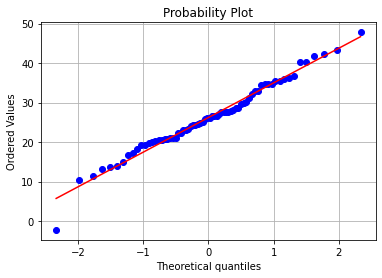

In [26]:
#### generating normal distribution
v_normal = np.random.normal(loc=25, scale=8, size=70)
stats.probplot(v_normal, dist="norm",plot=plt)
plt.grid()

print("The obtained p-value for the shapiro test is: {}".format(stats.shapiro(v_normal)[-1]))
print("This value is higher than > 0.05, so we do not reject our null hypothesis and we can assume that the data has a normal distributin (as expected)")

## 4. F Distribution

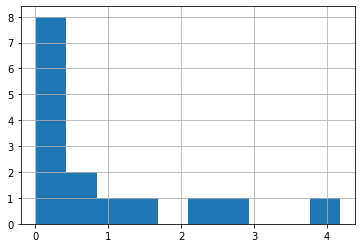

In [27]:
r = f.rvs(2, 10, size=15)

plt.hist(r)
plt.grid()

## T-Test between 2 samples
In this example we simulate the means and standarts deviations from a product "X" while placed in two different positions on the market and test if there are differences in its selling

In [34]:
mu1 = 150.1 #means of product x at position a
mu2 = 182.1 #means of product x at position b

### Standart Deviations
s1 = 17
s2 = 19.2

#### Number of observations
n1 = 25
n2 = 30

### T-Test using formula 
t = (mu1-mu2)/np.sqrt((s1**2/n1) + (s2**2/n2))

vendas_A = np.random.normal(loc=mu1, scale=s1, size=n1)
vendas_B = np.random.normal(loc=mu2, scale=s2, size = n2)

### T-test using 
pt = stats.ttest_ind(vendas_A,vendas_B)[-1]
print("The obtained value for the T-test was: {}".format(pt))
print("This value is < 0.05 which means that we can reject our null hypothesis and consider that \nthere are differences on the sale of product X while placed in these two positions")

The obtained value for the T-test was: 3.578233000023496e-10
This value is < 0.05 which means that we can reject our null hypothesis and consider that 
there are differences on the sale of product X while placed in these two positions


# Pandas Dataframe - Basics

In [35]:
#Cria o data frame
dados = pd.DataFrame({'Vendas_Cafe':(18, 20, 23, 23, 23, 23, 24, 25, 26, 26, 26, 26, 27,
28, 28,29, 29, 30, 30, 31, 31, 33, 34, 35, 38, 39, 41, 44, 44, 46),
'Preco_Cafe':(4.77, 4.67, 4.75, 4.74, 4.63, 4.56, 4.59, 4.75, 4.75, 4.49,
4.41, 4.32, 4.68, 4.66, 4.42, 4.71, 4.66, 4.46, 4.36, 4.47, 4.43,
4.4, 4.61, 4.09, 3.73, 3.89, 4.35, 3.84, 3.81, 3.79),
'Promocao': ("Nao", "Nao", "Nao", "Nao", "Nao", "Nao", "Nao", "Nao",
"Sim",
"Nao", "Sim", "Nao", "Nao", "Sim", "Sim", "Nao", "Sim", "Sim",
"Sim", "Nao", "Nao", "Sim", "Sim", "Sim", "Nao", "Sim", "Sim",
"Sim", "Sim", "Sim"),
'Preco_Leite':(4.74, 4.81, 4.36, 4.29, 4.17, 4.66, 4.73, 4.11, 4.21, 4.25,
4.62, 4.53, 4.44, 4.19, 4.37, 4.29, 4.57, 4.21, 4.77, 4, 4.31,
4.34, 4.05, 4.73, 4.07, 4.75, 4, 4.15, 4.34, 4.15) })

In [36]:
dados.head(5)

,Vendas_Cafe,Preco_Cafe,Promocao,Preco_Leite
0,18,4.77,Nao,4.74
1,20,4.67,Nao,4.81
2,23,4.75,Nao,4.36
3,23,4.74,Nao,4.29
4,23,4.63,Nao,4.17


## Scatter plot to compare coffee prices and sales

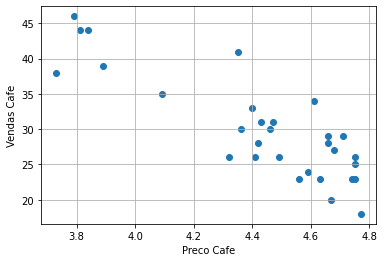

In [37]:
plt.scatter(dados['Preco_Cafe'],dados['Vendas_Cafe'])
plt.ylabel('Vendas Cafe')
plt.xlabel("Preco Cafe")
plt.grid()

## Describing general informations from our dataframe

In [38]:
dados.describe()

,Vendas_Cafe,Preco_Cafe,Preco_Leite
count,30.000000,30.000000,30.000000
mean,30.000000,4.426333,4.373667
std,7.310833,0.322057,0.255808
min,18.000000,3.730000,4.000000
25%,25.250000,4.352500,4.175000
50%,28.500000,4.480000,4.325000
75%,33.750000,4.667500,4.607500
max,46.000000,4.770000,4.810000


# Linear regression between coffee prices and sales

In [39]:
gradient, intercept, r_value, p_value, std_err = stats.linregress(dados['Preco_Cafe'],dados['Vendas_Cafe'])

In [40]:
##X = df[['Weight', 'Volume']]
##y = df['CO2']

##regr = linear_model.LinearRegression()
##regr.fit(X, y)

# Second dataframe example

In [61]:
##############
dados = pd.DataFrame({'Preco':(368.384514890573, 446.850186825816, 
          414.72765691978, 434.291090918223, 436.652686535348, 457.65797344255, 
          490.694346597566, 474.881781399868, 458.462395897205, 412.719412673294, 
          448.799032112411, 352.040747235864, 449.461858221104, 416.150953927119, 
          416.499426750268, 551.315803331779, 462.126789471159, 515.957335395508, 
          467.598697162974, 339.548470369391), 
"Portas":("duas_portas", "quatro_portas", "duas_portas", "quatro_portas", "quatro_portas", 
          "duas_portas", "quatro_portas", "duas_portas", "quatro_portas", 
          "duas_portas", "quatro_portas", "quatro_portas", "duas_portas", 
          "quatro_portas", "duas_portas", "quatro_portas", "quatro_portas", 
          "duas_portas", "quatro_portas", "quatro_portas"),
"Ar_Condicionado":("sem_ar_condicionado",  "com_ar_condicionado", "com_ar_condicionado", "com_ar_condicionado", 
                  "com_ar_condicionado", "com_ar_condicionado", "com_ar_condicionado", 
                  "com_ar_condicionado", "com_ar_condicionado", "com_ar_condicionado", 
                  "com_ar_condicionado", "sem_ar_condicionado", "com_ar_condicionado", 
                  "com_ar_condicionado", "com_ar_condicionado", "com_ar_condicionado", 
                  "com_ar_condicionado", "com_ar_condicionado", "com_ar_condicionado", 
                  "sem_ar_condicionado"),
"Quadrimestre":("segundo_quadrimestre","segundo_quadrimestre", "segundo_quadrimestre", "segundo_quadrimestre", 
                 "segundo_quadrimestre", "terceiro_quadrimestre", "primeiro_quadrimestre", 
                 "primeiro_quadrimestre", "terceiro_quadrimestre", "segundo_quadrimestre", 
                 "terceiro_quadrimestre", "segundo_quadrimestre", "terceiro_quadrimestre", 
                 "segundo_quadrimestre", "segundo_quadrimestre", "primeiro_quadrimestre", 
                 "terceiro_quadrimestre", "primeiro_quadrimestre", "primeiro_quadrimestre", 
                 "segundo_quadrimestre"), 
"Idade_Locatario":(23, 18, 28, 21, 18, 21, 18, 20, 25, 29, 18, 33, 20, 21, 18, 21, 18, 20, 25, 29),
"Quilometragem":(957.442780544097, 829.533278217768, 923.300215829467, 871.519116905113, 930.704105677958, 554.696695914233, 501.941059782271, 
                  665.435074822519, 568.24079543466, 930.704105677958, 554.696695914233, 
                  829.533278217768, 665.435074822519, 871.519116905113, 930.704105677958, 
                  351.547138218644, 501.941059782271, 447.872006186523, 568.24079543466, 
                  930.704105677958), 
"Dolar":(4.41147933990862, 5.63014407874318, 
         8.80557934010615, 4.260591319988649, 6.93416279643155, 1.61130694543154, 
         2.57813244655973, 4.66666728709914, 1.6846066723224, 7.33872353619711, 
         4.52300814589177, 2.96689816205009, 9.91448182957733, 8.55577847959413, 
         5.93424935955983, 5.55775429484673, 6.94475470863839, 4.74330294976712, 
         4.723306965757987, 4.7010894862212)})

In [62]:
dados.head()

,Preco,Portas,Ar_Condicionado,Quadrimestre,Idade_Locatario,Quilometragem,Dolar
0,368.384515,duas_portas,sem_ar_condicionado,segundo_quadrimestre,23,957.442781,4.411479
1,446.850187,quatro_portas,com_ar_condicionado,segundo_quadrimestre,18,829.533278,5.630144
2,414.727657,duas_portas,com_ar_condicionado,segundo_quadrimestre,28,923.300216,8.805579
3,434.291091,quatro_portas,com_ar_condicionado,segundo_quadrimestre,21,871.519117,4.260591
4,436.652687,quatro_portas,com_ar_condicionado,segundo_quadrimestre,18,930.704106,6.934163


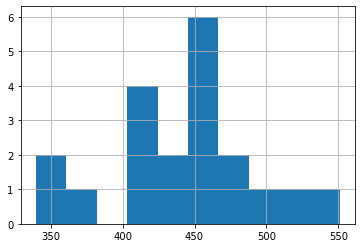

In [63]:
plt.hist(dados['Preco'])
plt.grid()

## Does the car prices follows a normal distribution? 

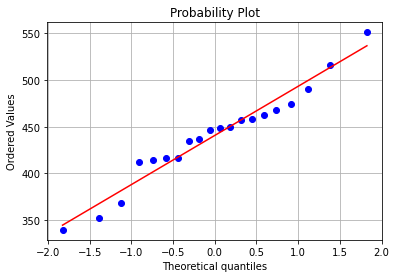

In [64]:
stats.probplot(dados['Preco'], dist="norm",plot=plt)
plt.grid()

Checkin if there is any outlier on the price column

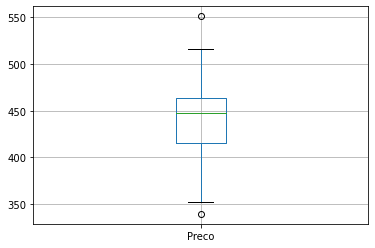

In [65]:
boxplot = dados.boxplot(column=['Preco'])

In [66]:
dados['Preco'].median()

447.8246094691135

## Grouping data by Annual Quarters

In [67]:
por_quadri = dados.groupby(by=['Quadrimestre']).median()

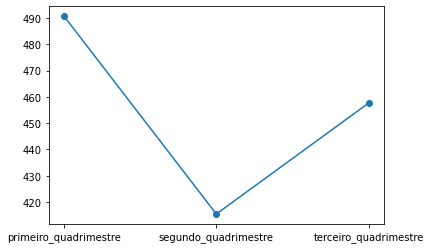

In [68]:
plt.plot(por_quadri['Preco'],marker='o')

In [69]:
primeiroq = dados[dados["Quadrimestre"] == "primeiro_quadrimestre"]
segundoq = dados[dados["Quadrimestre"] == "segundo_quadrimestre"]
terceiroq = dados[dados["Quadrimestre"] == "terceiro_quadrimestre"]


In [77]:
### Calculando as medias das populacoes
media1 = np.nanmean(primeiroq['Preco'])
media2 = np.nanmean(segundoq['Preco'])
media3 = np.nanmean(terceiroq['Preco'])

#Media Global
mediat = np.nanmean(dados['Preco'])

#### Achando o Squared Sum entre as populacoes
SSentre = len(primeiroq)*((media1-mediat)**2)+len(segundoq)*((media2-mediat)**2)+len(terceiroq)*((media3-mediat)**2)
SSentre = SSentre/2

### Achando o SS dentro das populaçoes
p1 = (primeiroq['Preco']-media1)**2
p2 = (segundoq['Preco']-media2)**2
p3 = (terceiroq['Preco']-media3)**2

SSdentro = np.sum(p1) + np.sum(p2) + np.sum(p3)
SSdentro = SSdentro/20-3

## Perfoming a F-test to see if there are differences between car prices in relation to the quarters 

In [78]:
from scipy.stats import f_oneway

pf = f_oneway(primeiroq['Preco'],segundoq['Preco'],terceiroq['Preco'])

print("The obtained p-value for the f-test is: {}".format(pf[-1]))
print("This value is < 0.05 and hence we reject our null hypothesis, and samples means are not equal")
print("So we can conclude that there are differences between the cars prices in relation to the annual quarters.")

The obtained p-value for the f-test is: 0.00012590494540944483
This value is < 0.05 and hence we reject our null hypothesis, and samples means are not equal
So we can conclude that there are differences between the cars prices in relation to the annual quarters.


## Perfoming a T-Test to check if there are differences between car prices and the number of doors.

In [80]:
##### Duas portas
duasportas = dados[dados["Portas"] == "duas_portas"]
quatroportas = dados[dados["Portas"] == "quatro_portas"]

stats.ttest_ind(duasportas['Preco'],quatroportas['Preco'])

Ttest_indResult(statistic=-0.13610586880799594, pvalue=0.8932482377048807)

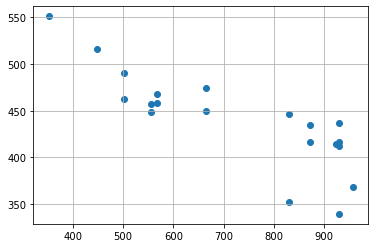

In [81]:
plt.scatter(dados['Quilometragem'],dados['Preco'])
plt.grid()

## Linear regression between cars mileage and price 

In [82]:
gradient, intercept, r_value, p_value, std_err = stats.linregress(dados['Quilometragem'],dados['Preco'])
r_value**2

0.6775859439211247

In [83]:
gradient

-0.21064768306640186

In [84]:
dados['Quilometragem'].describe()

count     20.000000
mean     719.285530
std      199.574967
min      351.547138
25%      554.696696
50%      747.484177
75%      925.151188
max      957.442781
Name: Quilometragem, dtype: float64

In [85]:
dados['Quilometragem'].std()/dados['Quilometragem'].mean()

0.2774627864026658